# Grupo 3
## Bruno Dueñas, Fernando Mejía, Mateo Córdova

## Librerias y datos globales

In [105]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
import graphviz
#Labels
labelsFarmacos = ["Presion","Azucar","Indice", "Alergia", 'Otras', 'Administrar']
labelsWeather = ['Tiempo', 'Temperatura', 'Humedad', 'Viento', 'Juega']
#Data
farmacos_data = pd.read_csv("farmacos.csv",index_col=0)
weather_data = pd.read_csv("weather.csv",index_col=0)
farmcos_test = pd.read_csv("farmacosTest.csv", index_col=0)
weather_test = pd.read_csv("weatherTest.csv", index_col=0)

# Ejercicio 1: Fármacos
## Data

In [106]:
farmacos_data.head()

,Presion,Azucar,Indice,Alergia,Otras,Administrar
Paciente,,,,,,
1,Alta,Alto,Alto,No,No,Si
2,Alta,Alto,Alto,Si,No,Si
3,Baja,Alto,Bajo,No,No,Si
4,Media,Alto,Alto,No,Si,No
5,Media,Bajo,Alto,Si,Si,No


# Preprocesamiento de datos automático con librería sklearn

In [107]:
data = pd.DataFrame()
le = preprocessing.LabelEncoder()
for v in labelsFarmacos:
  le.fit(farmacos_data[v])
  data[v] = le.transform(farmacos_data[v])
#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
t_data = data[data.columns[0:5]]
t_respuesta = data[data.columns[5]]
#crear el modelo
clf = clf.fit(t_data, t_respuesta)

## Datos del modelo
### t_data

In [108]:
t_data

,Presion,Azucar,Indice,Alergia,Otras
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,1,0,0
3,2,0,0,0,1
4,2,1,0,1,1
5,1,1,0,1,1
6,0,1,0,1,0
7,0,1,1,0,1
8,0,0,1,1,1
9,1,1,0,1,1


### t_respuesta

In [109]:
t_respuesta

0     1
1     1
2     1
3     0
4     0
5     1
6     1
7     1
8     0
9     1
10    1
11    0
12    1
13    1
Name: Administrar, dtype: int32

### Modelo

In [110]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Graficar el árbol

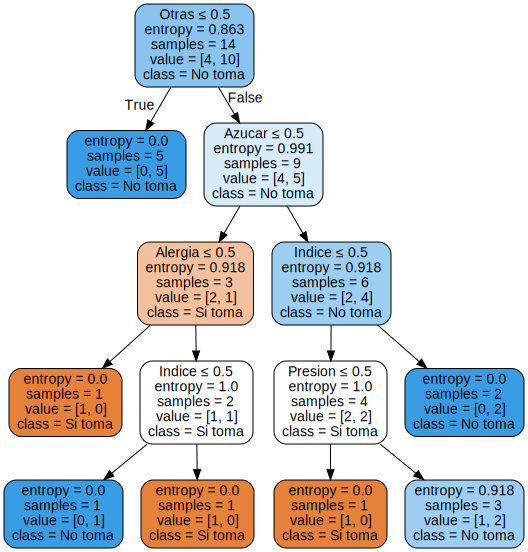

In [111]:
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = list(t_data.columns.values),
                                class_names = ["Si toma","No toma"],
                                filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

## Test del modelo automático
### Sacar la data del csv de pruebas con sklearn prepocessing

In [112]:
farmcos_test = pd.read_csv("farmacosTest.csv", index_col=0)
data_test = pd.DataFrame()
le = preprocessing.LabelEncoder()
for v in labelsFarmacos:
    le.fit(farmcos_test[v])
    data_test[v] = le.transform(farmcos_test[v])
x_test = data_test[data_test.columns[0:5]]

# Prediccion

In [113]:
y_respuesta = clf.predict(x_test)

## Datos

In [114]:
t_data

,Presion,Azucar,Indice,Alergia,Otras
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,1,0,0
3,2,0,0,0,1
4,2,1,0,1,1
5,1,1,0,1,1
6,0,1,0,1,0
7,0,1,1,0,1
8,0,0,1,1,1
9,1,1,0,1,1


## Resultados datos de entrenamiento

In [115]:
t_respuesta

0     1
1     1
2     1
3     0
4     0
5     1
6     1
7     1
8     0
9     1
10    1
11    0
12    1
13    1
Name: Administrar, dtype: int32

## Resultados datos de test

In [116]:
y_respuesta

array([1, 1, 1])

## Preprocesamiento de datos manual con librería pandas

In [117]:
data = farmacos_data.copy()
data["Presion"] = np.where(data["Presion"] == "Alta",2,
                        np.where(data["Presion"] == "Media",1,0))
data["Azucar"] = np.where(data["Azucar"] == "Alto",1,0)
data["Indice"] = np.where(data["Indice"] == "Alto",1,0)
data["Alergia"] = np.where(data["Alergia"] == "Si",1,0)
data["Otras"] = np.where(data["Otras"] == "Si",1,0)
#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
t_data = data[data.columns[0:5]]
t_respuesta = data[data.columns[5]]
#crear el modelo
clf = clf.fit(t_data, t_respuesta)

## Graficar el árbol manual

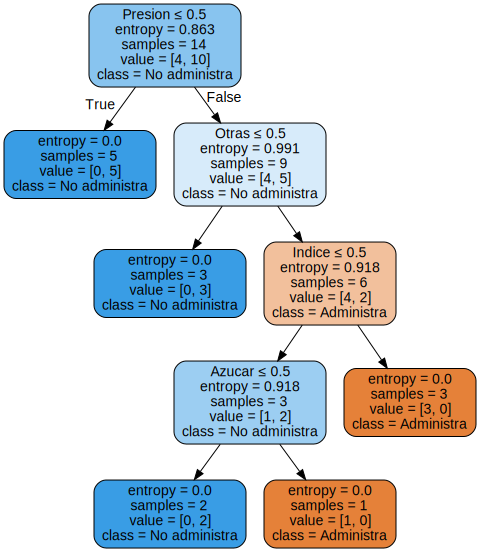

In [118]:
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = list(t_data.columns.values),
                                class_names = ["Administra","No administra"],
                                filled = True, rounded = True, special_characters = True)

graph = graphviz.Source(dot_data)
graph

## Test del modelo
### Sacar la data del csv de pruebas con preprocesing manual pandas

In [119]:
data_testM = farmcos_test.copy()
data_testM["Presion"] = np.where(data_testM["Presion"] == "Alta",2,
                        np.where(data_testM["Presion"] == "Media",1,0))
data_testM["Azucar"] = np.where(data_testM["Azucar"] == "Alto",1,0)
data_testM["Indice"] = np.where(data_testM["Indice"] == "Alto",1,0)
data_testM["Alergia"] = np.where(data_testM["Alergia"] == "Si",1,0)
data_testM["Otras"] = np.where(data_testM["Otras"] == "Si",1,0)

x_test = data_testM[data_test.columns[0:5]]
#crear el modelo
y_respuesta = clf.predict(x_test)

## Datos

In [120]:
t_data

,Presion,Azucar,Indice,Alergia,Otras
Paciente,,,,,
1,2,1,1,0,0
2,2,1,1,1,0
3,0,1,0,0,0
4,1,1,1,0,1
5,1,0,1,1,1
6,0,0,1,1,1
7,2,0,1,1,0
8,2,0,0,0,1
9,2,1,0,1,1


## Resultados datos de entrenamiento

In [121]:
t_respuesta

Paciente
1     Si
2     Si
3     Si
4     No
5     No
6     Si
7     Si
8     Si
9     No
10    Si
11    Si
12    No
13    Si
14    Si
Name: Administrar, dtype: object

## Resultados datos de test

In [122]:
y_respuesta

array(['Si', 'Si', 'Si'], dtype=object)